In [123]:
import pandas as pd
from sklearn import svm
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
import joblib
import cv2
import random
from Preprocessing_pipline import mask_scab, mask_rust_healthy, preprocess_image
from Feature_extraction_pipline import extract_color_features, features2array
from sklearn.metrics import confusion_matrix


In [112]:
# Cargar los modelos guardados desde archivos
best_rf_model = joblib.load('../Modelos/best_rf_model.pkl')
best_knn_model = joblib.load('../Modelos/best_knn_model.pkl')
best_svm_model = joblib.load('../Modelos/best_svm_model.pkl')

[375, 279, 253, 689, 100]


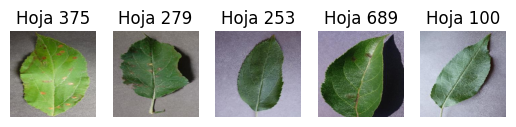

In [113]:
PATH= '..\\Base de datos\\BD 810\\'

random_images = random.sample(range(1, 811), 5)
print (random_images)
x=0
org_images = []
for i in random_images:
    x=x+1
    org_images.append (cv2.imread(PATH + str(i) + ".jpg", cv2.IMREAD_COLOR))
    plt.subplot(1,5,x)
    plt.imshow(cv2.cvtColor(org_images[-1], cv2.COLOR_BGR2RGB))
    plt.title('Hoja '+str(i))
    plt.axis('off')
plt.show()


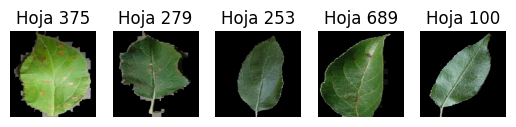

In [114]:
filtered_image = []
x=0
for i in random_images:
    x=x+1
    org_image = org_images[x-1]
    green_segmented = preprocess_image(org_image)
    filtered_image = preprocess_image(org_image)
    plt.subplot(2,5,x)
    plt.imshow(cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB))
    plt.title('Hoja '+str(i))
    plt.axis('off')
plt.show()
#plt.savefig("Hojas sin fondo")



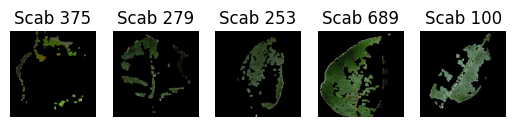

In [115]:
scab_images = []
x=0
for i in random_images:
    x=x+1
    org_image = org_images[x-1]
    scab_images.append(mask_scab(org_image))
    plt.subplot(2,5,x)
    plt.imshow(cv2.cvtColor(scab_images[-1], cv2.COLOR_BGR2RGB))
    plt.title('Scab '+str(i))
    plt.axis('off')
plt.show()
#plt.savefig("Hojas scab")

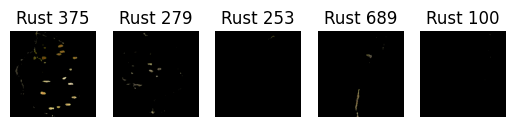

In [116]:
rust_images = []
x=0
for i in random_images:
    x=x+1
    org_image = org_images[x-1]
    rust_images.append(mask_rust_healthy(org_image))
    plt.subplot(2,5,x)
    plt.imshow(cv2.cvtColor(rust_images[-1], cv2.COLOR_BGR2RGB))
    plt.title('Rust '+str(i))
    plt.axis('off')
plt.show()
#plt.savefig("Hojas Rust")

In [117]:
df_prediction = pd.DataFrame(columns=['All Features'])
PATH= '..\\Base de datos\\BD 810\\'
x=0
for i in random_images:
    x=x+1
    org_image = org_images[x-1]
    scab_image = scab_images[x-1]
    rust_image = rust_images[x-1]
    features_org = features2array(extract_color_features(org_image))
    features_rust = features2array(extract_color_features(scab_image))
    features_scab = features2array(extract_color_features(rust_image))
    new_line = [features_scab + features_rust + features_org]
    # Agregar la nueva fila utilizando el método loc
    df_prediction.loc[len(df_prediction)] = new_line
    #new_line = {"Image ID":str(i), "Features Scab":features_scab, "Features Rust":features_rust, "Features Original":features_org}
    #df = df.append(new_line, ignore_index=True)
print (df_prediction)

#df_prediction.to_csv('..\\Base de datos\\Feature_extraction_predictions.csv', index=False)

c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


                                        All Features
0  [2.809026082356771, 19.624137260417584, 0.1866...
1  [0.81634521484375, 9.10386924033675, 0.0756428...
2  [0.029566446940104168, 1.3682271535237915, 0.0...
3  [0.6378173828125, 8.443715670913742, 0.0502616...
4  [0.0088653564453125, 0.7966628971315503, 0.000...


In [118]:
def expandir_columnas(row):
    valores = row['All Features']
    for i, valor in enumerate(valores):
        row[f'Feature_{i+1}'] = valor
    return row

# Aplicar la función a cada fila del DataFrame
df_prediction = df_prediction.apply(expandir_columnas, axis=1)
df_prediction = df_prediction.drop(['All Features'], axis = 1)
print (df_prediction)

   Feature_1  Feature_2  Feature_3  Feature_4   Feature_5  Feature_6   
0   2.809026  19.624137   0.186673   5.184221  252.190974  19.624137  \
1   0.816345   9.103869   0.075643   2.332052  254.183655   9.103869   
2   0.029566   1.368227   0.001865   0.382496  254.970434   1.368227   
3   0.637817   8.443716   0.050262   2.183259  254.362183   8.443716   
4   0.008865   0.796663   0.000777   0.208711  254.991135   0.796663   

   Feature_7  Feature_8  Feature_9  Feature_10  ...  Feature_39  Feature_40   
0   0.414404   0.421054   0.013863    0.089598  ...    0.302023    0.215023  \
1   0.415076   0.423485   0.003723    0.040837  ...    0.246244    0.208617   
2   0.416582   0.424836   0.000218    0.010122  ...    0.387713    0.257733   
3   0.415723   0.423844   0.003082    0.039129  ...    0.349547    0.230304   
4   0.416640   0.424897   0.000052    0.004714  ...    0.405017    0.272487   

   Feature_41  Feature_42  Feature_43  Feature_44  Feature_45  Feature_46   
0    0.472609  

In [119]:
# Cargar los modelos guardados desde archivos
best_rf_model = joblib.load('../Modelos/best_rf_model.pkl')
best_knn_model = joblib.load('../Modelos/best_knn_model.pkl')
best_svm_model = joblib.load('../Modelos/best_svm_model.pkl')

['Rust' 'Rust' 'Rust' 'Rust' 'Rust']


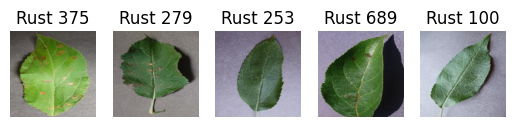

In [128]:
results = best_rf_model.predict(df_prediction)
print (results)
x=0
for i in random_images:
    x=x+1
    org_images.append (cv2.imread(PATH + str(i) + ".jpg", cv2.IMREAD_COLOR))
    plt.subplot(1,5,x)
    plt.imshow(cv2.cvtColor(org_images[-1], cv2.COLOR_BGR2RGB))
    plt.title(str(results[x-1])+" "+str(i))
    plt.axis('off')
plt.show()



['Rust' 'Rust' 'Rust' 'Rust' 'Rust']


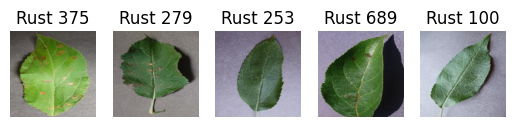

In [131]:
results = best_knn_model.predict(df_prediction)
print (results)
x=0
for i in random_images:
    x=x+1
    org_images.append (cv2.imread(PATH + str(i) + ".jpg", cv2.IMREAD_COLOR))
    plt.subplot(1,5,x)
    plt.imshow(cv2.cvtColor(org_images[-1], cv2.COLOR_BGR2RGB))
    plt.title(str(results[x-1])+" "+str(i))
    plt.axis('off')
plt.show()

['Rust' 'Rust' 'Healthy' 'Scab' 'Healthy']


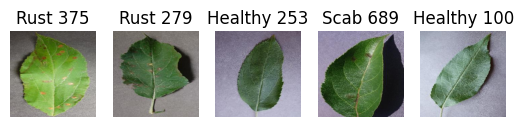

In [132]:
results = best_svm_model.predict(df_prediction)
print (results)
x=0
for i in random_images:
    x=x+1
    org_images.append (cv2.imread(PATH + str(i) + ".jpg", cv2.IMREAD_COLOR))
    plt.subplot(1,5,x)
    plt.imshow(cv2.cvtColor(org_images[-1], cv2.COLOR_BGR2RGB))
    plt.title(str(results[x-1])+" "+str(i))
    plt.axis('off')
plt.show()